# TP : Classification de Tweets avec RNN et LSTM

Ce notebook vous guide à travers les étapes de préparation, entraînement et test de modèles de classification de texte à base de RNN. Vous allez utiliser un jeu de données de tweets annotés en français.

## Pré-requis
Installez les bibliothèques suivantes si nécessaire :
```bash
pip install numpy pandas matplotlib scikit-learn tensorflow nltk spacy
```

## Exercice 1 : Préparation des données

In [ ]:
# TP : Classification de Tweets avec RNN et LSTM

In [ ]:
# ============================
# Exercice 1 : Préparation des données
# ============================

In [1]:
#importer : pandas, numpy, re, string, train_test_split, LabelEncoder, un tokenizer, un sequence-padder.
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
# a faire : Charger les données et afficher les 5 premiers lignes.
##
data=pd.read_csv(r"C:\Users\kamal\Downloads\fr_tweets_500k.csv", encoding="utf-8")
data.head()
##


,label,text
0,0,Little Debbie m'a dit que vous jouiez à des qu...
1,0,", Me taquine ... au moment où l'enfant part, j..."
2,0,dit hélas SLR cassé
3,0,courage! Est-ce que vous ne vous êtes pas dipl...
4,1,est en ligne.


In [3]:
# a faire : Nettoyage du texte
def clean_text(text):
    # Mettre en minuscules, supprimer la ponctuation, les chiffres, etc.
    text = text.lower()

    text = text.translate(str.maketrans("", "", string.punctuation))

    text = re.sub(r'\d+', '', text)

    text = " ".join(text.split())

    return text

In [4]:
# Appliquer le nettoyage sur la colonne 'clean_text'
data['clean_text'] = data['text'].apply(clean_text)
# print(data['clean_text'].head())


# Encodage des labels
encoder = LabelEncoder()
data['label_encoded'] = encoder.fit_transform(data['label'])
print(data['label_encoded'])
# data.head()
# a faire  : Tokenization et padding des phrases
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")  # Garder les 5000 mots les plus fréquents
tokenizer.fit_on_texts(data['clean_text'])
# Conversion en séquences
sequences = tokenizer.texts_to_sequences(data['clean_text'])

# Padding
MAX_LEN = 30  # Longueur maximale d'une séquence
padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

print(padded_sequences)
##
# a faire  : Split des données
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label_encoded'], test_size=0.2, random_state=42)


0         0
1         0
2         0
3         0
4         1
         ..
499994    1
499995    1
499996    0
499997    0
499998    0
Name: label_encoded, Length: 499999, dtype: int64
[[   1    1   32 ...    0    0    0]
 [  22    1   31 ...    0    0    0]
 [ 136 2243    1 ...    0    0    0]
 ...
 [  15   10 1961 ...    0    0    0]
 [ 354  389    1 ...    0    0    0]
 [  95   55   37 ...    0    0    0]]


In [ ]:
# 1. Quelles sont les étapes nécessaires pour préparer un texte brut avant de l’utiliser dans un modèle de deep learning ?
        # Le nettoyage du texte
        # La tokenisation
        # L'encodage des labels
        # Le padding des séquences
        # La séparation des données
# 2. Pourquoi doit-on encoder les labels et effectuer du padding sur les séquences ?
        # padding>  parceque Les modèles de machine learning, y compris les modèles de deep learning, ne comprennent pas directement les labels sous forme de texte
        # sequences> Les modèles de deep learning attendent des entrées de taille uniforme. Les séquences de texte (après la tokenisation) peuvent avoir des longueurs différentes, ce qui pose problème pour l'entraînement du modèle.

# 3. Que représente la taille maximale d’une séquence et comment l'influence-t-elle l'entraînement ?
        #  représente la longueur maximale des séquences de texte que vous allez utiliser comme entrée dans le modèle
    # Influence sur l'entraînement:
            # Réduction de la perte d'information
            # Gestion des ressources computationnelles
            # Impact sur la performance du modèle

c:\Users\kamal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 30, 256)        │     7,680,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,700,609 (29.38 MB)

 Trainable params: 7,700,609 (29.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 365s 115ms/step - accuracy: 0.7297 - loss: 0.5349 - val_accuracy: 0.7790 - val_loss: 0.4712
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 338s 108ms/step - accuracy: 0.7843 - loss: 0.4602 - val_accuracy: 0.7831 - val_loss: 0.4617
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 371s 119ms/step - accuracy: 0.7943 - loss: 0.4440 - val_accuracy: 0.7850 - val_loss: 0.4593
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 333s 106ms/step - accuracy: 0.8011 - loss: 0.4330 - val_accuracy: 0.7866 - val_loss: 0.4602
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 373s 119ms/step - accuracy: 0.8070 - loss: 0.4228 - val_accuracy: 0.7859 - val_loss: 0.4599
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7849 - loss: 0.4605
Test Loss: 0.4599
Test Accuracy: 0.7859


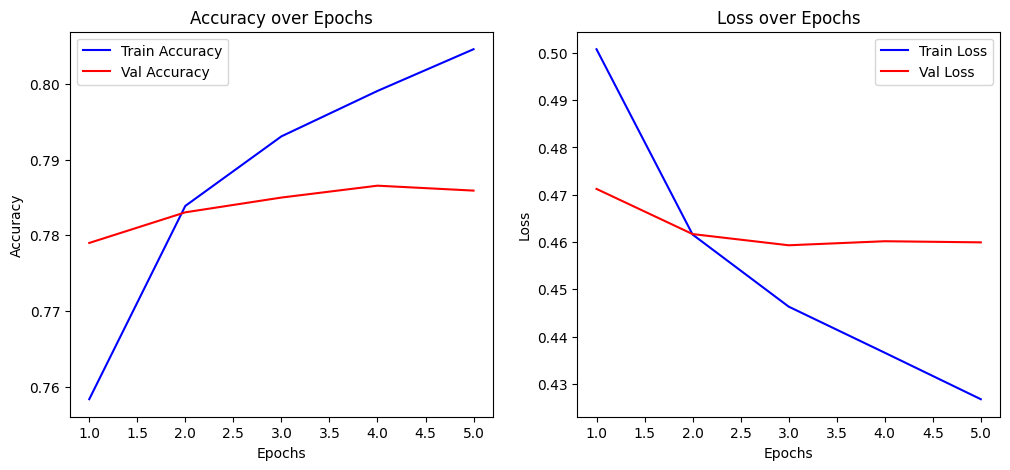

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 🧠 Construction du modèle RNN simple
model_rnn = Sequential([
    Embedding(input_dim=30000, output_dim=256, input_shape=(MAX_LEN,)),  # input_dim = vocab size, output_dim = embedding size
    Dropout(0.3),
    SimpleRNN(64),  # 64 memory units in RNN layer
    Dense(1, activation='sigmoid')  # sigmoid for binary classification
              ])

# 🛠️ Compilation du modèle
model_rnn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# 📊 Affichage du résumé du modèle
model_rnn.summary()

# 🚀 Entraînement du modèle
history_rnn = model_rnn.fit(X_train, y_train,
                            epochs=5,
                            batch_size=128,
                            validation_data=(X_test, y_test))

# 🧪 Évaluation du modèle
test_loss, test_acc = model_rnn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# 📈 Fonction pour tracer l'évolution de la précision et la perte
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Train Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Train Loss')
    plt.plot(epochs, val_loss, 'r', label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.show()

# 📊 Tracer les courbes d'entraînement
plot_accuracy_loss(history_rnn)


In [ ]:
# 1. Quelle est la structure de ce modele RNN et comment traite-t-il les séquences textuelles ?
        # Fonctionnement : Traite les mots un par un, en gardant une "mémoire" (état caché) des mots précédents.
        # Embedding : Convertit les mots en nombres (vecteurs).
        # Sortie : Le dernier état caché est utilisé pour prédire la classe (ex: positif/négatif).
# 2. Quels sont les avantages et limites d’un RNN simple pour la classification de texte ?
        #     Avantages :
        # Simple, efficace pour des phrases courtes.
        # Gère bien l'ordre des mots.
        #     Limites :
        # Oublie les mots anciens dans les longues phrases.
        # Lent (doit traiter les mots un à un).
# 3. Quelle fonction d’activation est utilisée en sortie et pourquoi ?
        # Softmax (si plusieurs classes) ou Sigmoïde (si binaire).
        # Pourquoi ? : Transforme les scores en probabilités (ex: 80% "positif").
# 4. Quelles stratégies peut-on utiliser pour améliorer les performances d’un RNN ? (e.g., augmentation des données, régularisation, changement d’architecture...)
        # Données : Augmenter le texte (ex: synonymes).
        # Régularisation : Ajouter du Dropout pour éviter le surapprentissage.
        # Architecture :
        # Remplacer le RNN par un LSTM ou GRU (meilleure mémoire).
        # Essayer un RNN bidirectionnel (contexte avant/arrière).
# 5. Si l’on applique ce modèle sur une base de données beaucoup plus grande, que peut-on attendre en termes de performance ? Quels en sont les avantages et les défis ?
        #  Avantages :
        # Meilleures performances (si modèle assez puissant).
        # Capture mieux les mots rares.
        # Défis :
        # Plus lent à entraîner.
        # Besoin de plus de puissance (GPU, RAM).

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 83ms/step - accuracy: 0.5514 - loss: 0.6819 - val_accuracy: 0.6304 - val_loss: 0.6521
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.6287 - loss: 0.6533 - val_accuracy: 0.6384 - val_loss: 0.6431
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.6326 - loss: 0.6477 - val_accuracy: 0.6399 - val_loss: 0.6409
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 79ms/step - accuracy: 0.6361 - loss: 0.6435 - val_accuracy: 0.6408 - val_loss: 0.6370
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.6370 - loss: 0.6426 - val_accuracy: 0.6439 - val_loss: 0.6363
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.6412 - loss: 0.6384 - val_accuracy: 0.6425 - val_loss: 0.6359
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.6395 - loss: 0.6385 - val_accuracy: 0.6442 - val_loss: 0.6348
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.6422 - loss: 0.6362 - 

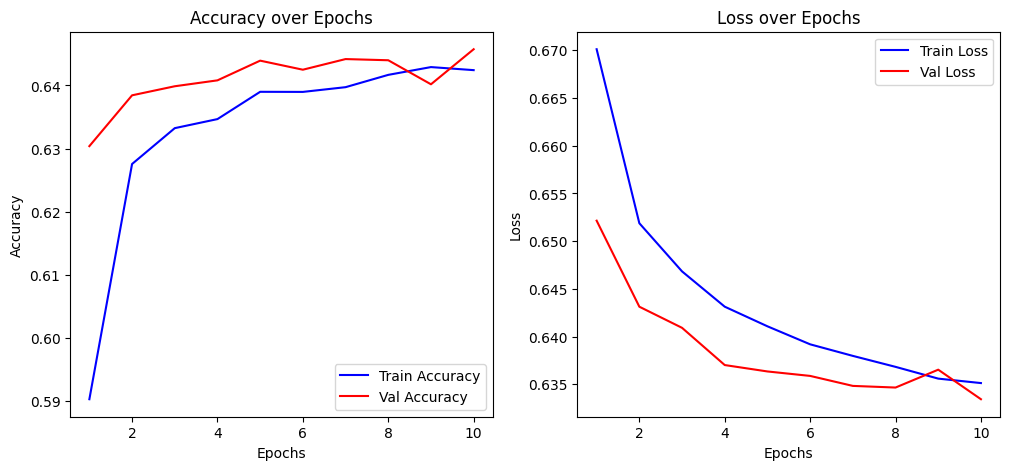

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

# Assumed: max_length is already defined from your padding setup
# Example: max_length = X_train.shape[1]

# 1. Build the model
model_lstm = Sequential([
    Embedding(input_dim=30000, output_dim=128, input_shape=(MAX_LEN,)),
    LSTM(128, return_sequences=False, dropout=0.3, recurrent_dropout=0.3),  # Regularization
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 2. Compile the model
model_lstm.compile(
    optimizer=Adam(learning_rate=0.001),  # Lower LR for smoother convergence
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

# 3. Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 4. Train the model
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# 5. Evaluate the model
test_loss, test_acc = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# 6. Plot training history
plot_accuracy_loss(history_lstm)

In [ ]:
# 1. En quoi un LSTM est-il une amélioration par rapport au RNN ?
        # Problème du RNN : "Oublie" les informations lointaines (gradient vanishing/exploding).
        # Solution LSTM :
        # Mémoire à long terme via 3 portes (input, forget, output).
        # Mieux adapté aux séquences longues (ex: phrases complexes).
# 2. Quelle est la différence entre un LSTM et un GRU (Gated Recurrent Unit) ?
        #     LSTM
        # 3 portes (input, forget, output);Mémoire séparée (cell state + hidden state);Plus précis mais lent
        #     GRU
        # 2 portes (update, reset);Mémoire unifiée;Plus précis mais lent	Plus rapide, presque aussi efficace
        #   GRU : Bon compromis vitesse/précision pour des séquences moyennes.
# 3. Est-ce que le modèle LSTM converge plus rapidement que le RNN ? Pourquoi ?
        # LSTM converge souvent plus vite car :
        # Gère mieux le gradient (moins de vanishing/exploding).
        # Apprend plus efficacement les dépendances à long terme.
        # Mais : Plus de paramètres → Peut être plus lent par epoch.
# 4. Quels hyperparamètres du modèle LSTM pourrait-on ajuster pour améliorer ses performances ?
        # Nombre d'unités (64, 128...) → Capacité du modèle.
        # Taux d'apprentissage (learning rate) : 0.001 à 0.0001.
        # Dropout (ex: 0.2) pour éviter l'overfitting.
        # Batch size (32, 64, 128) → Vitesse/stabilité.
        # Bidirectionnel → Capture le contexte avant/arrière.
# 5. Peut-on bénéficier de modèles plus profonds (empiler plusieurs couches LSTM) ? Quelles en seraient les conséquences ?
        # Possible (ex: 2-3 couches), mais :
        # Avantages : Capture des motifs hiérarchiques complexes.
        # Risques :
        # Overfitting si peu de données.
        # Très long à entraîner.
        # Astuce : Ajouter du Dropout entre les couches.
# 6. Si on dispose d’une base de données beaucoup plus variée et volumineuse, comment cela influencerait-il la qualité des prédictions ?
        # Avantages :
        # Meilleure généralisation (moins d'overfitting).
        # Capture des motifs rares/contextes variés.
        # Défis :
        # Besoin de plus de puissance (GPU, RAM).
        # Temps d'entraînement plus long.


In [30]:
# ============================
# Exercice 4 : Tester sur nouveaux tweets
# ============================

# a faire : Liste de nouveaux tweets
new_tweets = [
    "Ce produit est génial, je le recommande fortement !",
    "Je suis très déçu par la qualité, service horrible..."
]

new_tweets_cleaned = [clean_text(tweet) for tweet in new_tweets]  # Application à chaque tweet

# a faire : Nettoyage, tokenization et padding des nouveaux tweets
# new_sequences = tokenizer.texts_to_sequences(...)
# new_padded = pad_sequences(...)

# a faire : Prédictions avec les deux modèles

# Tokenization et padding
new_sequences = tokenizer.texts_to_sequences(new_tweets_cleaned)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post')

# Prédictions
preds_rnn = model_rnn.predict(new_padded)
preds_lstm = model_lstm.predict(new_padded)

# Affichage des résultats
for i, tweet in enumerate(new_tweets):
    print(f"\nTweet: {tweet}")
    print(f"RNN Prediction: {'Positif' if preds_rnn[i] > 0.5 else 'Negatif'} ({preds_rnn[i][0]:.2f})")
    print(f"LSTM Prediction: {'Positif' if preds_lstm[i] > 0.5 else 'Negatif'} ({preds_lstm[i][0]:.2f})")
    print("---")

# Version alternative avec probabilités
print("\nDétails des prédictions:")
for i, tweet in enumerate(new_tweets):
    print(f"\nTweet: {tweet}")
    print(f"RNN - Probabilité positive: {preds_rnn[i][0]:.2%}")
    print(f"LSTM - Probabilité positive: {preds_lstm[i][0]:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step

Tweet: Ce produit est génial, je le recommande fortement !
RNN Prediction: Negatif (0.45)
LSTM Prediction: Negatif (0.41)
---

Tweet: Je suis très déçu par la qualité, service horrible...
RNN Prediction: Negatif (0.45)
LSTM Prediction: Negatif (0.38)
---

Détails des prédictions:

Tweet: Ce produit est génial, je le recommande fortement !
RNN - Probabilité positive: 45.32%
LSTM - Probabilité positive: 41.18%

Tweet: Je suis très déçu par la qualité, service horrible...
RNN - Probabilité positive: 45.32%
LSTM - Probabilité positive: 37.59%


In [ ]:
# 1. Comment s’assurer que le prétraitement appliqué aux tweets de test est identique à celui des tweets d’entraînement ?
        # Utiliser les mêmes fonctions de nettoyage (minuscules, suppression de la ponctuation, etc.) que celles appliquées aux données d’entraînement.
        # Conserver le tokenizer entraîné (qui associe les mots à des indices numériques) et l’appliquer aux nouveaux tweets sans le ré-entraîner.
        # Respecter la même longueur maximale (padding/truncation) que celle utilisée lors de l’entraînement.
        # Documenter précisément les étapes de prétraitement pour les reproduire à l’identique en phase de test.
# 2. Pourquoi les modèles retournent-ils une probabilité au lieu d’une classe directement ?
        # Interprétabilité : La probabilité indique la confiance du modèle (ex : 0.9 = très sûr, 0.55 = incertain).
        # Flexibilité : On peut ajuster le seuil de décision (ex : 0.7 au lieu de 0.5 pour les cas critiques).
        # Analyse fine : Comparer les performances via des métriques comme l’AUC-ROC ou la courbe précision-rappel.
        # Cas ambigus : Un tweet à 0.51 et un à 0.49 sont très proches, la classe seule masquerait cette nuance.
# 3. Quelle serait la meilleure façon d’évaluer la performance sur des tweets réellement nouveaux ?
        # L’annotation humaine + des métriques ciblées (F1, AUC-ROC) donnent une évaluation fiable, complétée par des tests terrain.